INF2178 Technical Assignment 1 - Code <br>

Suha Lee <br>
1005155626 <br>
Last Modified: 04-02-2024

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

*Loading and Preprocessing Dataset*

In [ ]:
# Set path to dataset file
filepath = '/content/drive/MyDrive/2023 2024 Semester 2/INF2178/INF2178_A1_data.xlsx'

# Load dataframe
shelter_data = pd.read_excel(filepath)
shelter_data.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [ ]:
# Check missing values in dataframe
shelter_data.isna().sum()

OCCUPANCY_DATE                0
ORGANIZATION_NAME             0
PROGRAM_ID                    0
PROGRAM_NAME                 35
SECTOR                        0
PROGRAM_MODEL                 2
OVERNIGHT_SERVICE_TYPE        2
PROGRAM_AREA                  2
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       18545
OCCUPIED_BEDS             18545
CAPACITY_ACTUAL_ROOM      32399
OCCUPIED_ROOMS            32399
dtype: int64

We expect to have a number of null-values for the columns related to capacities and occupancies as they may not be applicable based on capacity type. However, we also observe null-values for categorical variables of interest, namely PROGRAM_MODEL, OVERNIGHT_SERVICE_TYPE, and PROGRAM_AREA.

In [ ]:
# Find rows with missing values for categorical variables
null_rows = shelter_data[shelter_data['PROGRAM_MODEL'].isnull() | shelter_data['OVERNIGHT_SERVICE_TYPE'].isnull() | shelter_data['PROGRAM_AREA'].isnull()]
null_rows

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
50757,2021-12-30,Homes First Society,16631,NaN,Mixed Adult,NaN,NaN,NaN,8,Bed Based Capacity,10.0,8.0,NaN,NaN
50893,2021-12-31,Homes First Society,16631,NaN,Mixed Adult,NaN,NaN,NaN,15,Bed Based Capacity,21.0,15.0,NaN,NaN


We can attempt to replace the null-values by finding other rows concerning the same program that are not missing values.

In [ ]:
# Check for other rows with same PROGRAM_ID to identify missing values
shelter_data[shelter_data['PROGRAM_ID'] == 16631]

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
50757,2021-12-30,Homes First Society,16631,NaN,Mixed Adult,NaN,NaN,NaN,8,Bed Based Capacity,10.0,8.0,NaN,NaN
50893,2021-12-31,Homes First Society,16631,NaN,Mixed Adult,NaN,NaN,NaN,15,Bed Based Capacity,21.0,15.0,NaN,NaN


Since no additional data concerning the program was found, we are unable to replace the missing values. Since only a small number of rows were affected, we can drop them without greatly impacting the dataset.

In [ ]:
# No suitable replacements found, drop rows missing relevant values
shelter_data = shelter_data[shelter_data['PROGRAM_ID'] != 16631]
shelter_data.reset_index(drop=True, inplace=True)

Since we are not interested in examining specific programs individually, we can drop columns used for program identification.

In [ ]:
# Drop columns used for identification of specific programs
shelter_data = shelter_data.drop(['PROGRAM_ID', 'ORGANIZATION_NAME', 'PROGRAM_NAME'], axis=1)
shelter_data.head()

,OCCUPANCY_DATE,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


We can create a continuious variable of occupancy rates for use in analysis based on the capacity and occupancy values present.

In [ ]:
# Create column OCCUPANCY_RATE based on reported capacities and occupancies
shelter_data['OCCUPANCY_RATE'] = shelter_data.apply(lambda row: (row['OCCUPIED_BEDS'] / row['CAPACITY_ACTUAL_BED'])
                                if row['CAPACITY_TYPE'] == 'Bed Based Capacity'
                                else (row['OCCUPIED_ROOMS'] / row['CAPACITY_ACTUAL_ROOM'])
                                if row['CAPACITY_TYPE'] == 'Room Based Capacity'
                                else None, axis=1)
shelter_data.head()

,OCCUPANCY_DATE,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE
0,2021-01-01,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,0.896552
1,2021-01-01,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,1.000000
2,2021-01-01,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,0.821429
3,2021-01-01,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,1.000000
4,2021-01-01,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,0.928571


In [ ]:
# Check for rows with invalid values of OCCUPANCY_RATE
invalid_occupancy = shelter_data[(shelter_data["OCCUPANCY_RATE"] < 0) | (shelter_data["OCCUPANCY_RATE"] > 1)]
invalid_occupancy

,OCCUPANCY_DATE,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE
23013,2021-06-11,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,137,Room Based Capacity,NaN,NaN,79.0,80.0,1.012658
24536,2021-06-22,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,115,Room Based Capacity,NaN,NaN,71.0,72.0,1.014085
24675,2021-06-23,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,117,Room Based Capacity,NaN,NaN,73.0,74.0,1.013699
24814,2021-06-24,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,111,Room Based Capacity,NaN,NaN,71.0,72.0,1.014085


Some rows have invalid values for OCCUPANCY_RATE due to inconsistencies in the reported capacity and occupancy values. Four rows have occupancy values greater than the reported capacities. It is unclear whether this was an error in reporting or the shelter was genuinely over capacity. For the purpose of this analysis the occupancies will be adjusted down so the OCCUPANCCY_RATE values do not exceed 1.

In [ ]:
# Find rows with invalid OCCUPANCY_RATE values
invalid_occupancy_rows = invalid_occupancy.index

# Adjust occupancy values so they do not exceed capacity values
shelter_data.loc[invalid_occupancy_rows, "OCCUPIED_ROOMS"] = shelter_data.loc[invalid_occupancy_rows, "CAPACITY_ACTUAL_ROOM"]

# Adjust occupancy rate values so they do not exceed 1
shelter_data.loc[invalid_occupancy_rows, "OCCUPANCY_RATE"] = 1

Based on CAPACITY_TYPE, each row should have two null values in the occupancy and capacity columns corresponding to the other capacity type.

In [ ]:
# Find invalid rows of CAPACITY_TYPE 'Bed Based Capacity'
bed_capacity_invalid = (shelter_data['CAPACITY_TYPE'] == 'Bed Based Capacity') & (shelter_data[['OCCUPIED_ROOMS', 'CAPACITY_ACTUAL_ROOM']].isnull().sum(axis=1) != 2)

# Find invalid rows of CAPACITY_TYPE 'Room Based Capacity'
room_capacity_invalid = (shelter_data['CAPACITY_TYPE'] == 'Room Based Capacity') & (shelter_data[['OCCUPIED_BEDS', 'CAPACITY_ACTUAL_BED']].isnull().sum(axis=1) != 2)

# Verify that no rows violate the proper format
invalid_rows = shelter_data[bed_capacity_invalid | room_capacity_invalid]
assert(len(invalid_rows) == 0)

The observations are spread out over the days of one year. For analysis, it may be useful to group and consider observations by month.

In [ ]:
# Create new column by extracting month value from OCCUPANCY_DATE
shelter_data['OCCUPANCY_MONTH'] = shelter_data['OCCUPANCY_DATE'].dt.month
shelter_data.head()

,OCCUPANCY_DATE,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE,OCCUPANCY_MONTH
0,2021-01-01,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,0.896552,1
1,2021-01-01,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,1.000000,1
2,2021-01-01,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,0.821429,1
3,2021-01-01,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,1.000000,1
4,2021-01-01,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,0.928571,1


In [ ]:
# Display all subclasses for each categorical variable
for categorical_var in ['SECTOR', 'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA', 'CAPACITY_TYPE']:
  print(categorical_var + ':')
  print(shelter_data[categorical_var].unique(), '\n')

SECTOR:
['Families' 'Mixed Adult' 'Men' 'Women' 'Youth'] 

PROGRAM_MODEL:
['Emergency' 'Transitional'] 

OVERNIGHT_SERVICE_TYPE:
['Motel/Hotel Shelter' 'Shelter' 'Interim Housing'
 'Isolation/Recovery Site' '24-Hour Respite Site' 'Warming Centre'
 "24-Hour Women's Drop-in"] 

PROGRAM_AREA:
['COVID-19 Response' 'Base Shelter and Overnight Services System'
 'Temporary Refugee Response' 'Winter Programs'] 

CAPACITY_TYPE:
['Room Based Capacity' 'Bed Based Capacity'] 



In [ ]:
# Display relevant information of the cleaned dataset
shelter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50942 entries, 0 to 50941
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50942 non-null  datetime64[ns]
 1   SECTOR                  50942 non-null  object        
 2   PROGRAM_MODEL           50942 non-null  object        
 3   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 4   PROGRAM_AREA            50942 non-null  object        
 5   SERVICE_USER_COUNT      50942 non-null  int64         
 6   CAPACITY_TYPE           50942 non-null  object        
 7   CAPACITY_ACTUAL_BED     32397 non-null  float64       
 8   OCCUPIED_BEDS           32397 non-null  float64       
 9   CAPACITY_ACTUAL_ROOM    18545 non-null  float64       
 10  OCCUPIED_ROOMS          18545 non-null  float64       
 11  OCCUPANCY_RATE          50942 non-null  float64       
 12  OCCUPANCY_MONTH         50942 non-null  int64 

*Exploratory Data Analysis*

In [ ]:
# Generate summary statistics for each of the numerical variables
numerical_variables = shelter_data[['SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS', 'OCCUPANCY_RATE']]
numerical_variables.describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE
count,50942.000000,32397.000000,32397.000000,18545.000000,18545.000000,50942.000000
mean,45.728515,31.628145,29.781400,55.549259,52.798382,0.930148
std,53.326660,27.128189,26.379825,59.448805,58.792876,0.138786
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.012048
25%,15.000000,15.000000,14.000000,19.000000,16.000000,0.923077
50%,28.000000,25.000000,23.000000,35.000000,34.000000,1.000000
75%,51.000000,43.000000,41.000000,68.000000,66.000000,1.000000
max,339.000000,234.000000,234.000000,268.000000,268.000000,1.000000


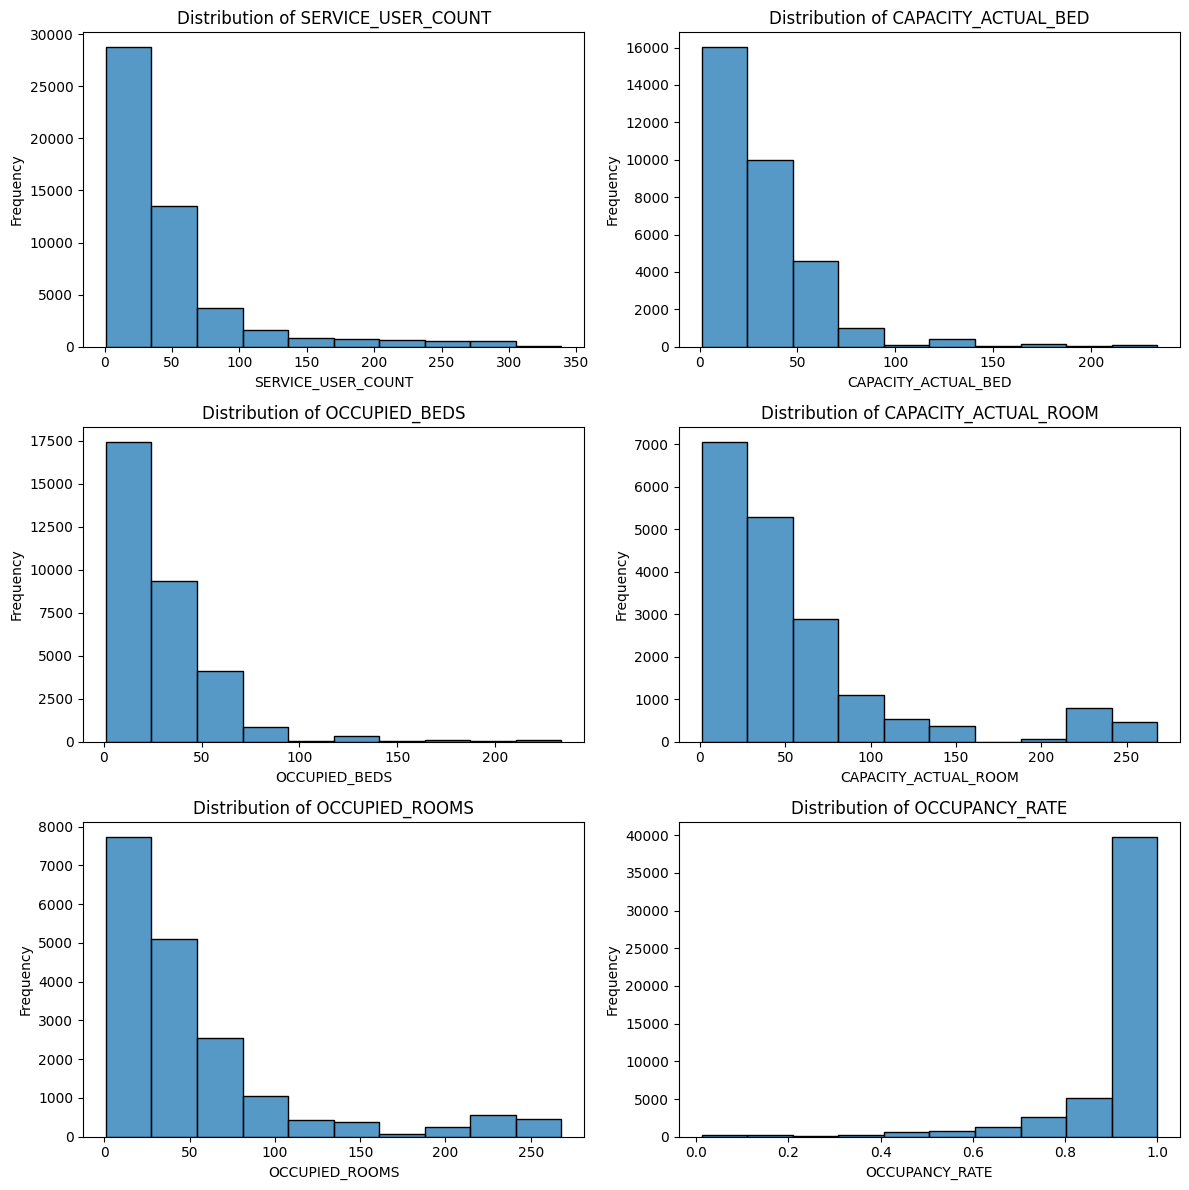

In [ ]:
# Prepare plot for histograms
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
ax = ax.flatten()

# Plot histogram for each numerical variable
for i, col in enumerate(numerical_variables):
    sns.histplot(data=numerical_variables, x=col, bins=10, ax=ax[i], edgecolor='black')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_ylabel('Frequency')

# Display plot
plt.tight_layout()
plt.show()

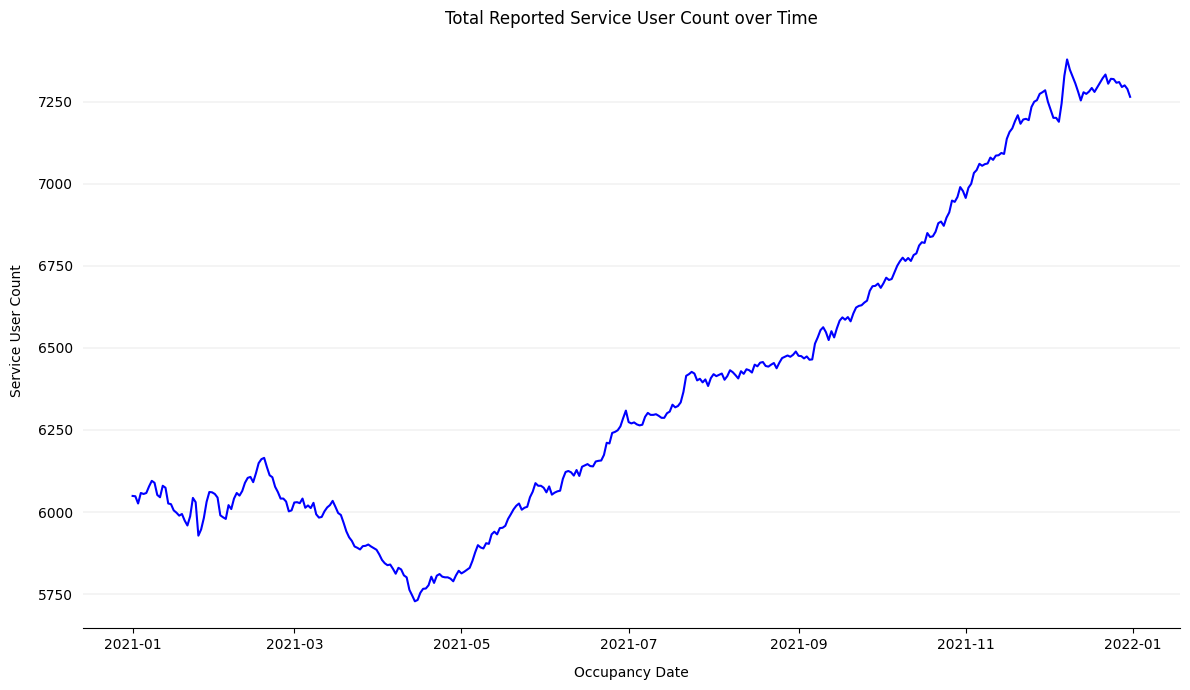

In [ ]:
# Aggregate SERVICE_USER_COUNT by date
aggregated_data = shelter_data.groupby('OCCUPANCY_DATE')['SERVICE_USER_COUNT'].sum().reset_index()

# Prepare plot for lineplot
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=aggregated_data, x='OCCUPANCY_DATE', y='SERVICE_USER_COUNT', linestyle='-', color='blue', ax=ax)

# Customize the lineplot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title and axis labels
ax.set_title('Total Reported Service User Count over Time')
ax.set_xlabel('Occupancy Date', labelpad=10)
ax.set_ylabel('Service User Count', labelpad=10)

# Display plot
plt.tight_layout()
plt.show()

A plot of total reported service user counts over time shows a slight dip in April 2021 before increasing at a steady rate for the rest of the year. Since the dataset does not provide additional information on the scope of coverage and other factors (COVID, legal changes, etc.) it is difficult to extrapolate meaning from these values. Instead, we will consider occupancy rates and make comparisons within the dataset.

In [ ]:
def plot_boxplot(categorical_var):
  """
  Calculates summary statistics for OCCUPANCY_RATE based on classes of a given
  categorial variable. Plots a boxplot of the data.

  Args:
    categorical_var: a string representing a variable in the shelter dataset
  Returns:
    None
  """
  # Print descriptive statistics for OCCUPANCY_RATE by the categorical variable
  grouped_data = shelter_data.groupby(categorical_var)['OCCUPANCY_RATE'].describe()
  print(grouped_data)

  # Prepare plot for boxplots of OCCUPANCY_RATE for each class of the categorical variable
  fig, ax = plt.subplots(figsize=(12, 7))
  sns.boxplot(x=categorical_var, y='OCCUPANCY_RATE', data=shelter_data, ax=ax)

  # Customize the boxplot appearance
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.yaxis.set_ticks_position('none')
  ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

  # Set plot title and axis labels
  ax.set_title(f'Distribution of Occupancy Rates by {categorical_var}')
  ax.set_xlabel(categorical_var)
  ax.set_ylabel('Occupancy Rate')

  # Display plot
  plt.show()

In [ ]:
def plot_bargraph(categorical_var):
  """
  Plots a bargraph of OCCUPANCY_RATE by month with each class of the given
  categorical variable in the shelter dataset.

  Args:
    categorical_var: a string representing a variable in the shelter dataset
  Returns:
    None
  """
  # Prepare plot for bargraph of mean OCCUPANCY_RATE over time for each class
  fig, ax = plt.subplots(figsize=(12, 7))
  sns.barplot(x='OCCUPANCY_MONTH', y='OCCUPANCY_RATE', hue=categorical_var, data=shelter_data, estimator=np.mean, errorbar=None)

  # Customize the bargraph appearance
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.yaxis.set_ticks_position('none')
  ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

  # Set plot title and axis labels
  ax.set_title(f'Mean Occupancy Rates by {categorical_var} and Month')
  ax.set_xlabel('Month')
  ax.set_ylabel('Mean Occupancy Rate')

  # Adjust legend to avoid overlapping
  plt.legend(title=categorical_var, bbox_to_anchor=(1.04, 1), loc="upper left")

  # Display plot
  plt.show()

               count      mean       std       min       25%       50%  75%  \
SECTOR                                                                        
Families      5649.0  0.921464  0.136948  0.083333  0.880597  1.000000  1.0   
Men          12241.0  0.966435  0.076146  0.142857  0.973684  1.000000  1.0   
Mixed Adult  15531.0  0.911910  0.179817  0.012048  0.913580  1.000000  1.0   
Women         9258.0  0.946970  0.110708  0.090909  0.947368  1.000000  1.0   
Youth         8263.0  0.897761  0.137277  0.277778  0.857143  0.944444  1.0   

             max  
SECTOR            
Families     1.0  
Men          1.0  
Mixed Adult  1.0  
Women        1.0  
Youth        1.0  


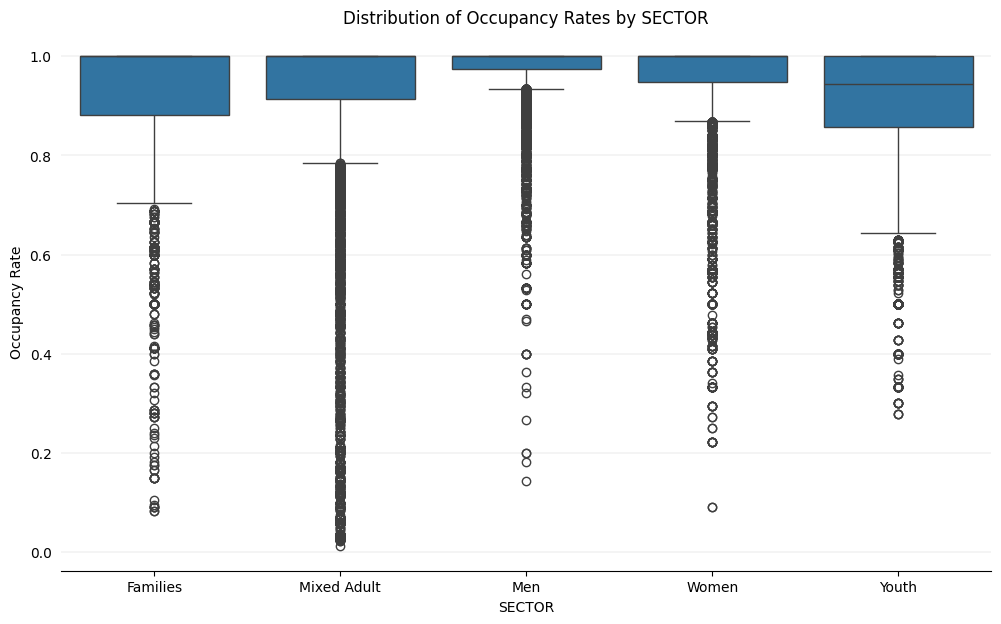

In [ ]:
plot_boxplot('SECTOR')

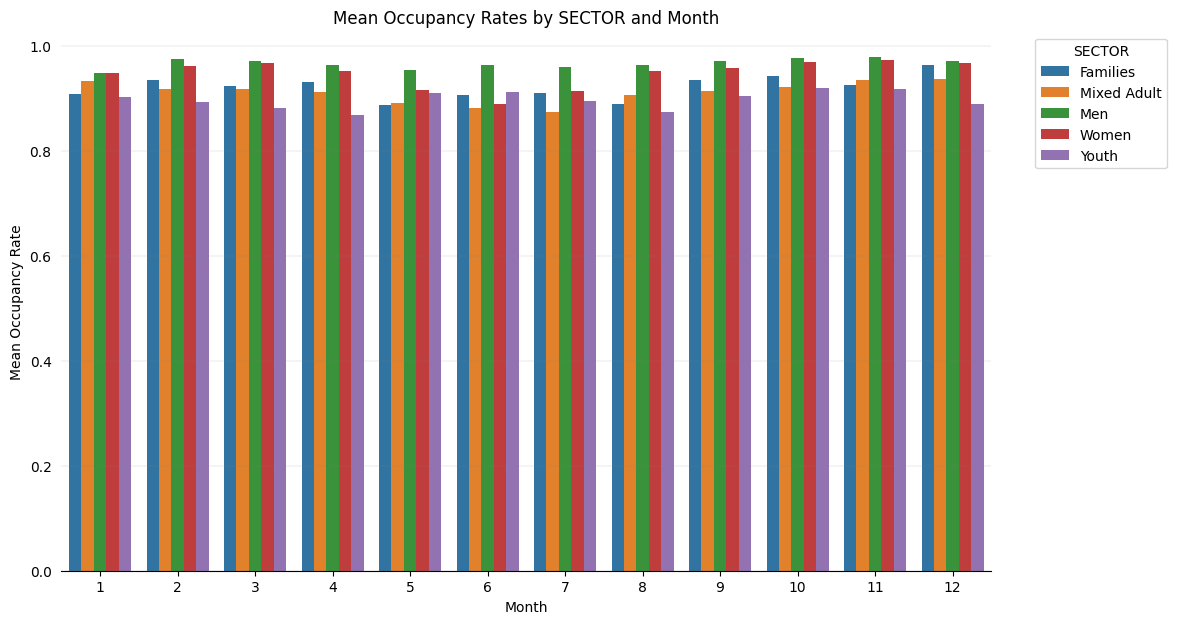

In [ ]:
plot_bargraph('SECTOR')

                 count      mean       std       min       25%       50%  75%  \
PROGRAM_MODEL                                                                   
Emergency      41541.0  0.941410  0.138558  0.012048  0.954545  1.000000  1.0   
Transitional    9401.0  0.880381  0.128472  0.222222  0.818182  0.918919  1.0   

               max  
PROGRAM_MODEL       
Emergency      1.0  
Transitional   1.0  


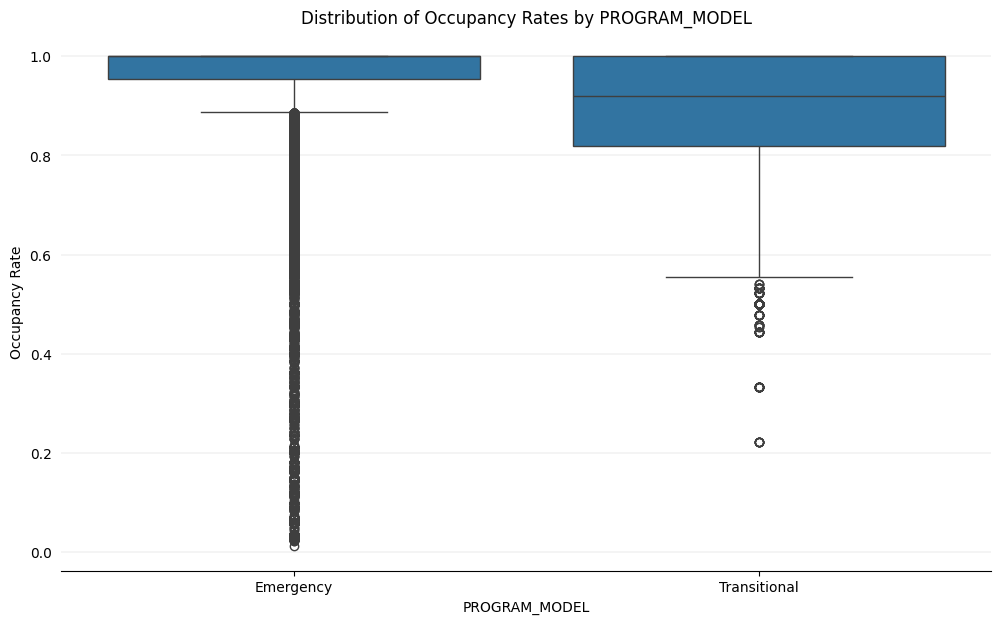

In [ ]:
plot_boxplot('PROGRAM_MODEL')

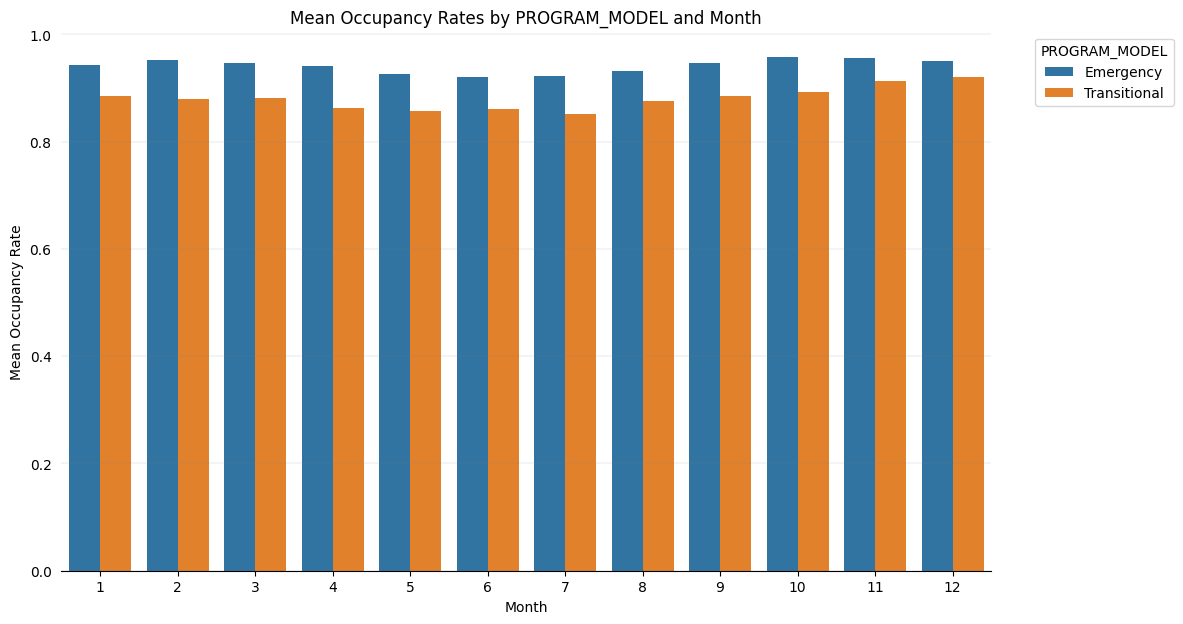

In [ ]:
plot_bargraph('PROGRAM_MODEL')

                           count      mean       std       min       25%  \
OVERNIGHT_SERVICE_TYPE                                                     
24-Hour Respite Site      2997.0  0.979422  0.055211  0.142857  0.977778   
24-Hour Women's Drop-in    515.0  0.773661  0.206999  0.090909  0.602273   
Interim Housing            720.0  0.948565  0.140449  0.400000  1.000000   
Isolation/Recovery Site    778.0  0.339245  0.251178  0.012048  0.117647   
Motel/Hotel Shelter      14280.0  0.967986  0.085545  0.022727  0.977778   
Shelter                  31465.0  0.925458  0.120909  0.083333  0.891892   
Warming Centre             187.0  0.858604  0.213699  0.066667  0.786364   

                              50%       75%  max  
OVERNIGHT_SERVICE_TYPE                            
24-Hour Respite Site     1.000000  1.000000  1.0  
24-Hour Women's Drop-in  0.840909  0.954545  1.0  
Interim Housing          1.000000  1.000000  1.0  
Isolation/Recovery Site  0.275019  0.542685  1.0  
Motel/Hot

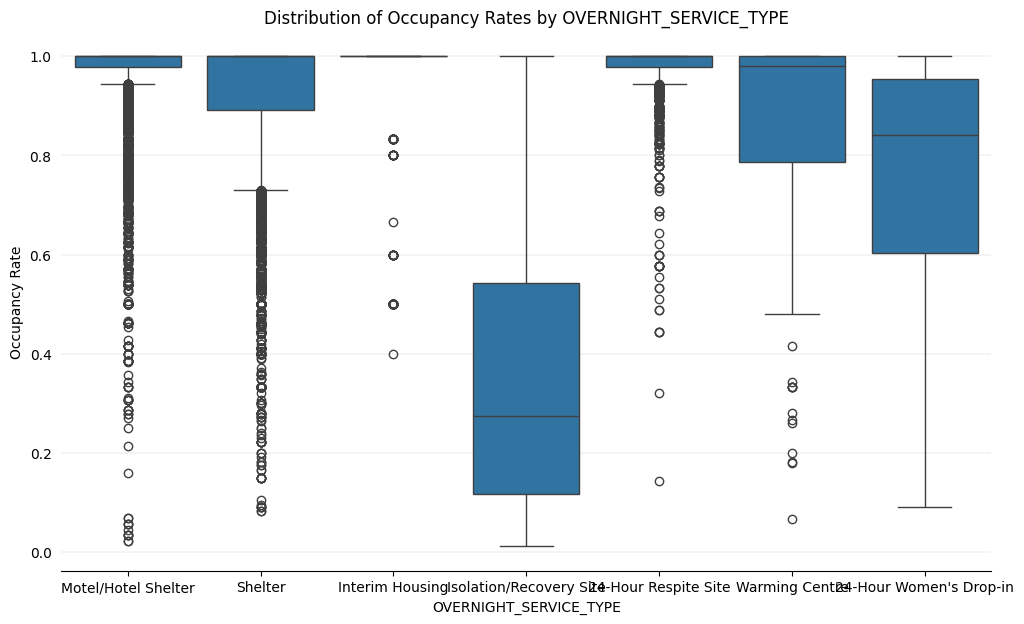

In [ ]:
plot_boxplot('OVERNIGHT_SERVICE_TYPE')

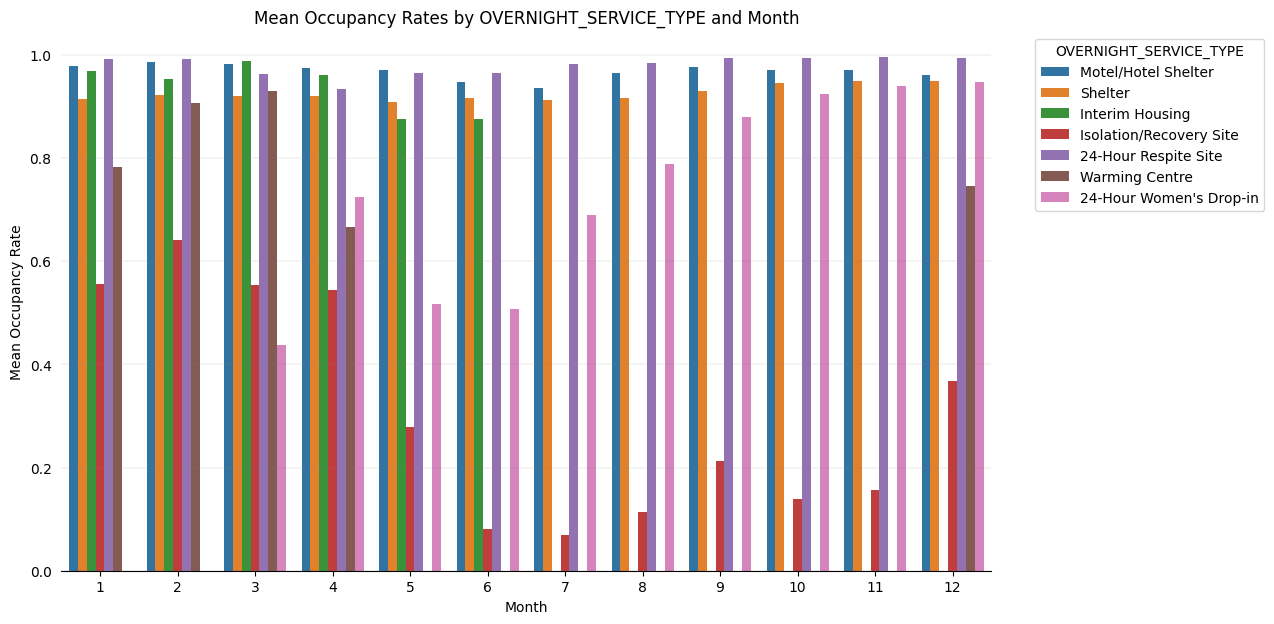

In [ ]:
plot_bargraph('OVERNIGHT_SERVICE_TYPE')

                                              count      mean       std  \
PROGRAM_AREA                                                              
Base Shelter and Overnight Services System  34398.0  0.929210  0.119473   
COVID-19 Response                           15785.0  0.931631  0.174081   
Temporary Refugee Response                    572.0  0.969018  0.051614   
Winter Programs                               187.0  0.858604  0.213699   

                                                 min       25%   50%  75%  max  
PROGRAM_AREA                                                                    
Base Shelter and Overnight Services System  0.083333  0.901235  1.00  1.0  1.0  
COVID-19 Response                           0.012048  0.964286  1.00  1.0  1.0  
Temporary Refugee Response                  0.779661  0.956522  1.00  1.0  1.0  
Winter Programs                             0.066667  0.786364  0.98  1.0  1.0  


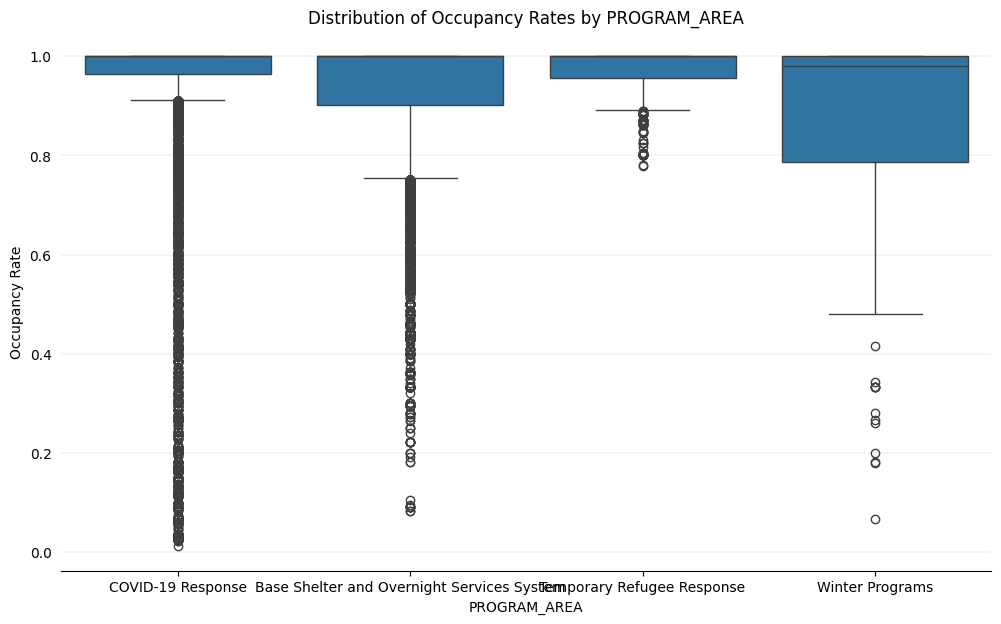

In [ ]:
plot_boxplot('PROGRAM_AREA')

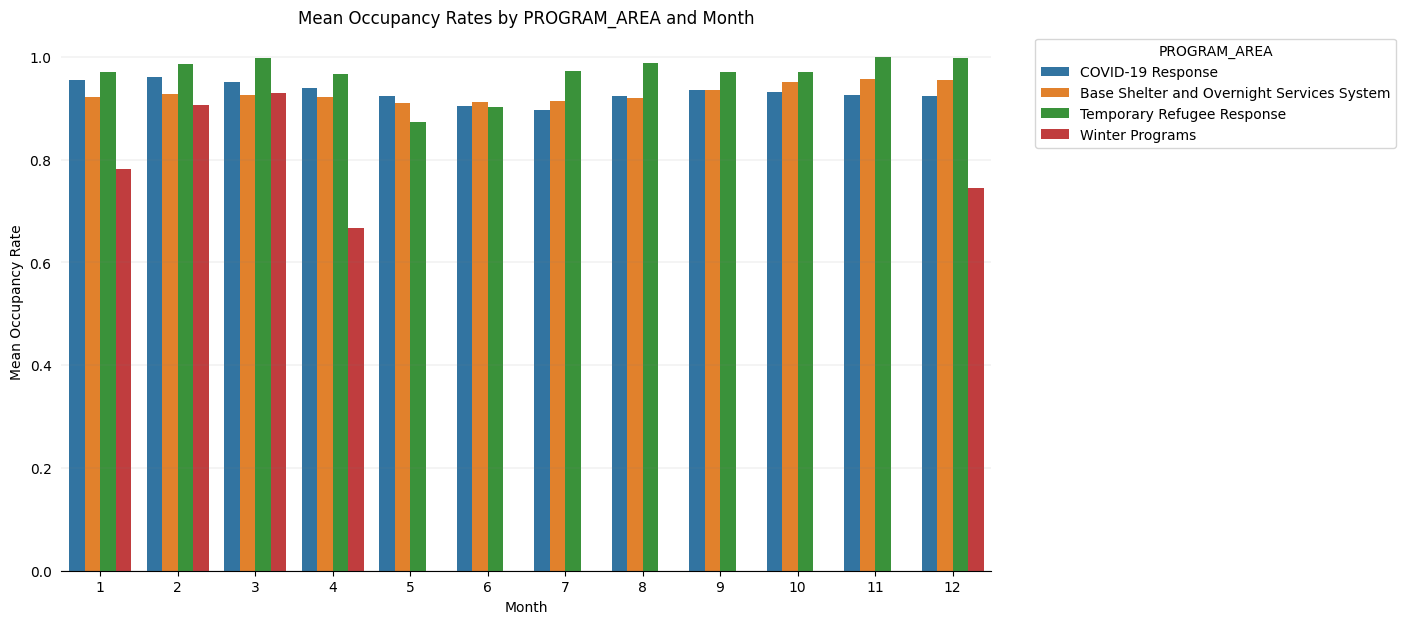

In [ ]:
plot_bargraph('PROGRAM_AREA')

                       count      mean       std       min       25%  50%  \
CAPACITY_TYPE                                                               
Bed Based Capacity   32397.0  0.927895  0.122558  0.022727  0.900000  1.0   
Room Based Capacity  18545.0  0.934084  0.163240  0.012048  0.958333  1.0   

                     75%  max  
CAPACITY_TYPE                  
Bed Based Capacity   1.0  1.0  
Room Based Capacity  1.0  1.0  


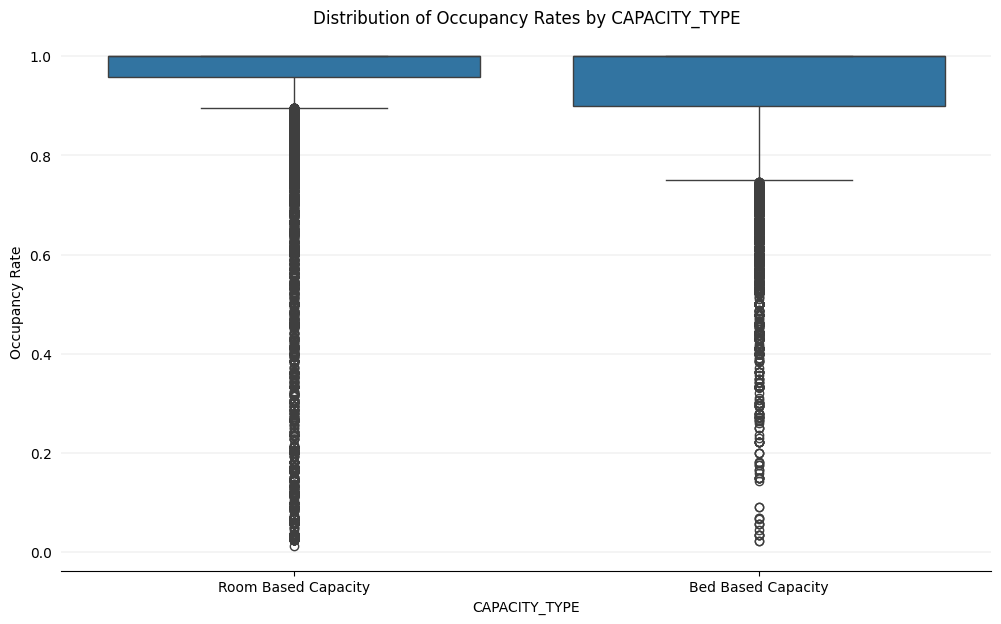

In [ ]:
plot_boxplot('CAPACITY_TYPE')

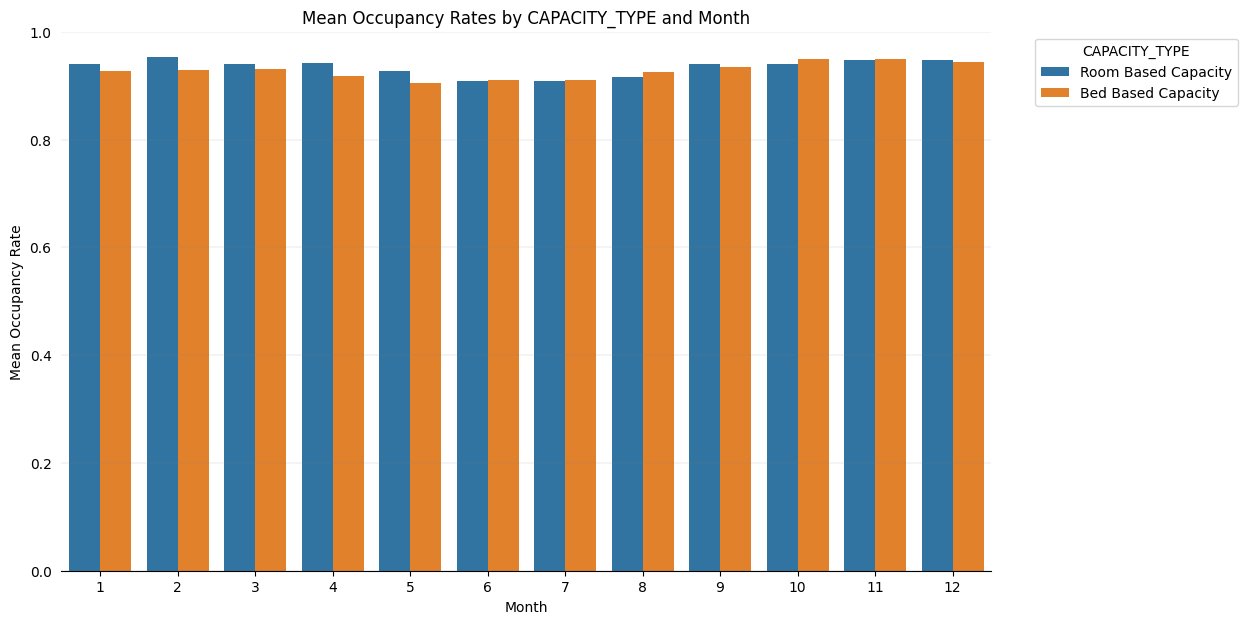

In [ ]:
plot_bargraph('CAPACITY_TYPE')

Noticeable variance in categorical variables such as OVERNIGHT_SERVICE_TYPE and PROGRAM_AREA are unsurprising. It is to be expected that users would have different needs and some program types would cater to them more closely. Although further analysis is possible to gauge the extent to which supply and demand differ, it is difficult to do so without knowing how thourough the dataset is. Instead, we will focus on CAPACITY_TYPE and further examine differences in occupancy rates based on other categorical variables.

In [ ]:
# Create pivot table displaying mean occupancy rates based on SECTOR and CAPACITY_TYPE
pivot_table = shelter_data.pivot_table(values='OCCUPANCY_RATE',
                                       index='SECTOR',
                                       columns='CAPACITY_TYPE',
                                       aggfunc='mean')

# Display the pivot table
pivot_table

CAPACITY_TYPE,Bed Based Capacity,Room Based Capacity
SECTOR,,
Families,0.788377,0.930657
Men,0.960008,0.996345
Mixed Adult,0.920785,0.899819
Women,0.939212,0.969882
Youth,0.880683,0.945445


T-Tests

We would like to perform T-Tests to check for statistically significant differences in mean occupancy rates based on different groupings. Before conducting a T-Test we need to check for independence, normality, and equal variances.


*   Given the large sample size of observations across different programs and shelter, we can generally assume that one day's observations are independent of another.
*   As observed in the boxplots, occupancy rates are generally heavily skewed towards 1 with a wide range of outliers falling below it. The distributions are not normal.
*   We are unable to state that there are equal variances in occupancy rates across the different groups we intend to observe.

Given that we fail normality and equal variances, we should consider using a Welch's T-Test. Welch's T-Test does not assume equal variances, and it is more robust to distributions differing from a normal one. In addition to the large sample size, trimming the observations to the IQR could help account for the heavily skewed distributions.



In [ ]:
def welchs_ttest(group1, group2, sig=0.05):
  """
  Performs the Welch's T-Test given two groups. Displays the results of the test
  and states a conclusion based on the provided significance level.

  Args:
    group1: a series representing the first group for comparison
    group2: a series representing the second group for comparison
    sig: a float representing the signficance level for the test (default=0.05)
  Returns:
    None
  """
  # Perform Welch's t-test trimmed to the IQR
  t_stat, p_value = stats.ttest_ind(group1, group2, trim=0.25, equal_var=False)

  # Print results of t-test
  print(f"Welch's t-test results:\nT-Statistic: {t_stat}\nP-Value: {p_value}")
  if p_value < sig:
    print('There is a statistically significant difference between the groups\' means.')
  else:
    print('There is no statistically significant difference between the groups\' means.')

We can utilize the T-Test to compare occupancy rates across different factors, such as

weather conditions (based on time of year)

In [ ]:
colder_months = [1, 2, 3, 10, 11, 12]
warmer_months = [4, 5, 6, 7, 8, 9]

group1 = shelter_data[shelter_data['OCCUPANCY_MONTH'].isin(colder_months)]['OCCUPANCY_RATE']
group2 = shelter_data[shelter_data['OCCUPANCY_MONTH'].isin(warmer_months)]['OCCUPANCY_RATE']
welchs_ttest(group1, group2)

Welch's t-test results:
T-Statistic: 19.987839130709368
P-Value: 4.728130719124408e-88
There is a statistically significant difference between the groups' means.


or sex

In [ ]:
group1 = shelter_data[shelter_data['SECTOR'] == 'Men']['OCCUPANCY_RATE']
group2 = shelter_data[shelter_data['SECTOR'] == 'Women']['OCCUPANCY_RATE']
welchs_ttest(group1, group2)

Welch's t-test results:
T-Statistic: 13.475368386327691
P-Value: 7.826274993609025e-41
There is a statistically significant difference between the groups' means.


Based on the differences in occupancy rates by capacity type observed in our EDA, we can run T-Tests for every subclass of each categorical variable divided by capacity type to identify which categories tend to skew towards a certain capacity type.

In [ ]:
print('Classes with statistically significant differences between capacity types:\n')

# Iterate through each class of each categorical variable
for categorical_var in ['SECTOR', 'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA']:
  for group in shelter_data[categorical_var].unique():

    # Filter data for the current subclass
    group_data = shelter_data[shelter_data[categorical_var] == group]

    # Split data by capacity type
    group1 = group_data[group_data['CAPACITY_TYPE'] == 'Room Based Capacity']['OCCUPANCY_RATE']
    group2 = group_data[group_data['CAPACITY_TYPE'] == 'Bed Based Capacity']['OCCUPANCY_RATE']

    # Perform Welch's t-test trimmed to the IQR
    t_stat, p_value = stats.ttest_ind(group1, group2, trim=0.25, equal_var=False)

    # Display result of test if statistically significant
    if p_value < 0.05:
      print(group, f'(P-Value: {p_value})')

Classes with statistically significant differences between capacity types:

Families (P-Value: 1.071241219604091e-200)
Mixed Adult (P-Value: 9.06778874233819e-91)
Men (P-Value: 4.309098186784349e-46)
Women (P-Value: 7.259738868334228e-55)
Youth (P-Value: 2.1885743598728367e-76)
Emergency (P-Value: 3.4076023397627547e-47)
Transitional (P-Value: 1.6852906550908115e-103)
Motel/Hotel Shelter (P-Value: 2.3062042116848434e-55)
Shelter (P-Value: 2.4468835591529988e-09)
COVID-19 Response (P-Value: 7.675627869347647e-28)
